In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv('../Data/LOLOracleData.csv')

In [55]:
df.drop(['server','summoner_name','Time'],axis=1,inplace=True)

In [56]:
df.head()

,winner,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup
0,Red,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma
1,Blue,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz
2,Blue,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai
3,Red,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke
4,Red,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon


In [57]:
df.columns

Index(['winner', 'BTop', 'BJng', 'BMid', 'BAdc', 'BSup', 'RTop', 'RJng',
       'RMid', 'RAdc', 'RSup'],
      dtype='object')

In [58]:
Blue=df.columns[1:6]
Red=df.columns[6:11]

In [59]:
df.loc[:,Blue]

,BTop,BJng,BMid,BAdc,BSup
0,Camille,Gragas,Yone,Jhin,Brand
1,Camille,Nidalee,Galio,Jhin,Anivia
2,Irelia,Ekko,Annie,Kai'Sa,Thresh
3,Graves,Kindred,Sylas,Vayne,Bard
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona
...,...,...,...,...,...
19674,Jayce,Graves,Viktor,Swain,Alistar
19675,Lucian,Lillia,Ekko,Vayne,Maokai
19676,Tristana,Graves,Wukong,Ziggs,Leona
19677,Vladimir,Udyr,Twisted Fate,Samira,Alistar


In [60]:
champ=df.copy()
champ.drop(['winner'],axis=1,inplace=True)

In [61]:
CSdf = pd.read_csv('../Data/ChampionWr.csv')

In [62]:
CSdf.head()

,Champions,BlueWon,BluePlayed,RedWon,RedPlayed,TotalPlayed,Bluewinrate,Redwinrate,Totalwinrate,Role1,Role2,#Role1,#Role2
0,Camille,1216,2319,1166,2270,4589,0.524364,0.513656,0.519067,Top,Mid,4076,309
1,Irelia,534,1084,538,1134,2218,0.492620,0.474427,0.483318,Top,Mid,1457,727
2,Graves,1583,3096,1343,2716,5812,0.511305,0.494477,0.503441,Jng,Mid,5708,48
3,Vladimir,302,608,274,596,1204,0.496711,0.459732,0.478405,Mid,Top,663,529
4,Volibear,182,404,189,412,816,0.450495,0.458738,0.454657,Top,Jng,588,176


In [63]:
cs=pd.DataFrame()
Roles = ['Top','Jng','Mid','Adc','Sup']
champ=CSdf.loc[0,'Champions']
role=CSdf.loc[0,'Role1']
Roles.remove(role)
blue=df.loc[(df['B'+role]==champ)];
red=df.loc[(df['R'+role]==champ)];
for i in Roles:
    cs=cs.append(blue['B'+i].value_counts());
    cs=cs.append(red['R'+i].value_counts());
    
    
Roles.append(role)
g=cs.sum(axis=0)
tm=g.idxmax()
#if tm=='Jhin' || tm=="Kai'Sa":
#        g=g.drop(g.idxmax())
#b=CSdf[CSdf['Champions']==tm]
#rolemt=CSdf.loc[CSdf[CSdf['Champions']==tm].index[0],'Role1'];
rolemt=CSdf.loc[CSdf['Champions']==tm,'Role1'].iloc[0];
ptr=red.loc[(red['R'+rolemt]==tm)];
ptb=blue.loc[(blue['B'+rolemt]==tm)];
b=len(ptb);
bw=len(ptb[ptb['winner']=='Blue']);
r=len(ptr);
rw=len(ptr[ptr['winner']=='Red']);
twr=(rw+bw)/(r+b)

In [64]:
cs

,Aatrox,Amumu,Cho'Gath,Dr. Mundo,Ekko,Elise,Evelynn,Fiddlesticks,Fizz,Gragas,...,Sona,Varus,Janna,Leona,Nami,Rakan,Rell,Soraka,Yuumi,Zyra
BJng,8.0,21.0,4.0,6.0,85.0,61.0,46.0,20.0,1.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RJng,3.0,15.0,3.0,6.0,87.0,61.0,52.0,23.0,NaN,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMid,NaN,NaN,1.0,NaN,104.0,NaN,NaN,2.0,58.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RMid,4.0,NaN,3.0,NaN,90.0,NaN,NaN,NaN,64.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAdc,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAdc,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,...,1.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BSup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,48.0,...,8.0,NaN,72.0,222.0,30.0,94.0,16.0,17.0,49.0,9.0
RSup,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,27.0,...,24.0,NaN,71.0,207.0,36.0,95.0,16.0,19.0,56.0,6.0


In [15]:
ka=pd.DataFrame()
#ka['Camille']=g

In [16]:
ka['Played together']=g

In [17]:
ka

,Played together
Aatrox,15.0
Amumu,36.0
Cho'Gath,12.0
Dr. Mundo,12.0
Ekko,370.0
...,...
Rakan,189.0
Rell,32.0
Soraka,36.0
Yuumi,105.0


In [18]:
type(rolemt)

str

In [19]:
twr

0.5349143610013175

In [20]:
g=cs.sum(axis=0)

In [21]:
g

Aatrox        15.0
Amumu         36.0
Cho'Gath      12.0
Dr. Mundo     12.0
Ekko         370.0
             ...  
Rakan        189.0
Rell          32.0
Soraka        36.0
Yuumi        105.0
Zyra          15.0
Length: 150, dtype: float64

In [22]:
sum(g)

16304.0

In [23]:
CSdf[CSdf['Champions']==champ]

,Champions,BlueWon,BluePlayed,RedWon,RedPlayed,TotalPlayed,Bluewinrate,Redwinrate,Totalwinrate,Role1,Role2,#Role1,#Role2
0,Camille,1216,2319,1166,2270,4589,0.524364,0.513656,0.519067,Top,Mid,4076,309


In [24]:
cd = pd.DataFrame(CSdf['Champions'])
cd['TotalPlayed']=CSdf['TotalPlayed']
cd['Totalwinrate']=CSdf['Totalwinrate']

In [25]:
import time
start=time.process_time();
for ii in range(len(CSdf)):    
    cs=pd.DataFrame()
    Roles = ['Top','Jng','Mid','Adc','Sup']
    champ=CSdf.loc[ii,'Champions']
    role=CSdf.loc[ii,'Role1']
    Roles.remove(role)
    blue=df.loc[(df['B'+role]==champ)];
    red=df.loc[(df['R'+role]==champ)];
    for i in Roles:
        cs=cs.append(blue['B'+i].value_counts());
        cs=cs.append(red['R'+i].value_counts());


    Roles.append(role)
    
    f=cs.sum(axis=0)
    cd.loc[ii,'Most played teammate(Love is in the air)'] = f.idxmax()
    cd.loc[ii,'Times played together'] = f.max()
    #new since 05.02.2020
    tm=f.idxmax()
    #if tm=='Jhin' or tm=="Kai'Sa":
        #f=f.drop(f.idxmax())
        
    #cd.loc[ii,'Most played teammate(without Jhin)'] = f.idxmax()
    #cd.loc[ii,'Times played together(without Jhin)'] = f.max()
    
    #rolemt=CSdf.loc[CSdf[CSdf['Champions']==tm].index[0],'Role1'];
    rolemt=CSdf.loc[CSdf['Champions']==tm,'Role1'].iloc[0];
    ptr=red.loc[(red['R'+rolemt]==tm)];
    ptb=blue.loc[(blue['B'+rolemt]==tm)];
    b=len(ptb);
    bw=len(ptb[ptb['winner']=='Blue']);
    r=len(ptr);
    rw=len(ptr[ptr['winner']=='Red']);
    twr=(rw+bw)/(r+b)
    
    cd.loc[ii,'Totalwinrate with Most played Teammate']= twr
end=time.process_time();
print(end-start)

3.460781321


In [26]:
n=20 #how often two champions have two play together to be considered in statistics
import time
start=time.process_time();
for ii in range(len(CSdf)):    
    ka=pd.DataFrame()
    cs=pd.DataFrame()
    Roles = ['Top','Jng','Mid','Adc','Sup']
    champ=CSdf.loc[ii,'Champions']
    role=CSdf.loc[ii,'Role1']
    Roles.remove(role)
    blue=df.loc[(df['B'+role]==champ)];
    red=df.loc[(df['R'+role]==champ)];
    for i in Roles:
        cs=cs.append(blue['B'+i].value_counts());
        cs=cs.append(red['R'+i].value_counts());


    Roles.append(role)
    
    f=cs.sum(axis=0)
    #ka['Teammates'] = f.index
    cd.loc[ii,'Most played teammate(Love is in the air)'] = f.idxmax()
    cd.loc[ii,'Times played together'] = f.max()
    ka['Times played together'] = f
    #new since 07.02.2020
    #tm=f.idxmax()
    #if tm=='Jhin' or tm=="Kai'Sa":
        #f=f.drop(f.idxmax())
        
    #cd.loc[ii,'Most played teammate(without Jhin)'] = f.idxmax()
    #cd.loc[ii,'Times played together(without Jhin)'] = f.max()
    
    #rolemt=CSdf.loc[CSdf[CSdf['Champions']==tm].index[0],'Role1'];
    for tm in f.index:
        rolemt=CSdf.loc[CSdf['Champions']==tm,'Role1'].iloc[0];
        ptr=red.loc[(red['R'+rolemt]==tm)];
        ptb=blue.loc[(blue['B'+rolemt]==tm)];
        b=len(ptb);
        bw=len(ptb[ptb['winner']=='Blue']);
        r=len(ptr);
        rw=len(ptr[ptr['winner']=='Red']);
        if b+r != 0:
            twr=(rw+bw)/(r+b)
        else: twr=np.NaN

        ka.loc[tm,'Winrate']= twr
    exec('Duos{} = ka.copy()'.format(champ[0:2]))
    cd.loc[ii,'Totalwinrate with Most played Teammate']= ka.loc[f.idxmax(),'Winrate']
    hist=ka[ka['Times played together']>=n]['Winrate']
    cd.loc[ii,'Winrate with all Teammates over {} Games'.format(n)]=np.mean(hist)
    cd.loc[ii,'Standard derivation wT over {} Games'.format(n)]=np.std(hist)
end=time.process_time();

print(end-start)

35.09372208


In [27]:
cd

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
0,Camille,4589,0.519067,Jhin,763.0,0.534914,0.514980,0.073339
1,Irelia,2218,0.483318,Kai'Sa,272.0,0.509294,0.488119,0.083300
2,Graves,5812,0.503441,Jhin,1073.0,0.502343,0.502248,0.068744
3,Vladimir,1204,0.478405,Kai'Sa,124.0,0.500000,0.480190,0.081375
4,Volibear,816,0.454657,Jhin,123.0,0.487805,0.465144,0.106323
...,...,...,...,...,...,...,...,...
148,Alistar,2989,0.520910,Kai'Sa,665.0,0.558104,0.519334,0.071504
149,Zyra,223,0.560538,Jhin,52.0,0.647059,0.555706,0.069497
150,Xayah,376,0.430851,Rakan,122.0,0.512397,0.412408,0.100825
151,Nami,759,0.524374,Lucian,152.0,0.509091,0.532448,0.091028


In [28]:
cd.sort_values('Standard derivation wT over {} Games'.format(n))

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
104,Vel'Koz,298,0.432886,Graves,24.0,0.291667,0.291667,0.0
55,Warwick,198,0.484848,Kai'Sa,22.0,0.500000,0.500000,0.0
84,Heimerdinger,326,0.564417,Graves,21.0,0.428571,0.428571,0.0
111,Aurelion Sol,128,0.531250,Kai'Sa,21.0,0.619048,0.619048,0.0
127,Veigar,184,0.483696,Ezreal,20.0,0.400000,0.400000,0.0
...,...,...,...,...,...,...,...,...
60,Yorick,94,0.531915,Thresh,14.0,0.500000,NaN,NaN
121,Trundle,112,0.383929,Jhin,14.0,0.428571,NaN,NaN
130,Corki,102,0.460784,Jhin,16.0,0.625000,NaN,NaN
131,Sivir,119,0.453782,Camille,14.0,0.461538,NaN,NaN


In [29]:
cd.sort_values('Totalwinrate with Most played Teammate', ascending=False)

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
17,Annie,595,0.524370,Graves,65.0,0.671875,0.529437,0.068806
86,Dr. Mundo,168,0.464286,Jhin,21.0,0.666667,0.500000,0.166667
149,Zyra,223,0.560538,Jhin,52.0,0.647059,0.555706,0.069497
130,Corki,102,0.460784,Jhin,16.0,0.625000,NaN,NaN
135,Ziggs,200,0.525000,Camille,16.0,0.625000,NaN,NaN
...,...,...,...,...,...,...,...,...
67,Shaco,757,0.462351,Jhin,74.0,0.383562,0.383311,0.073468
81,Singed,298,0.479866,Jhin,40.0,0.375000,0.470044,0.071690
88,Malzahar,212,0.490566,Jhin,35.0,0.371429,0.544502,0.113003
104,Vel'Koz,298,0.432886,Graves,24.0,0.291667,0.291667,0.000000


0.10410465739575807

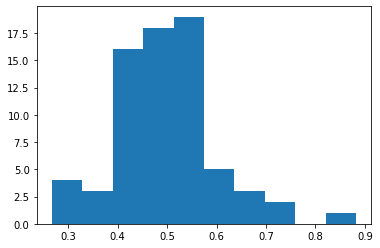

In [30]:
a=DuosCa[DuosCa['Times played together']>=20]['Winrate']
#a=b['Winrate']
plt.hist(a)
np.std(a)

0.1691340736934547

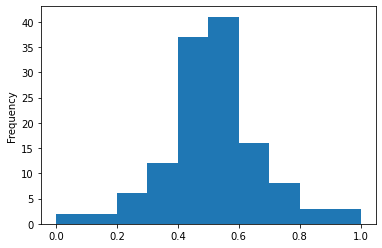

In [31]:
a=DuosCa['Winrate']
a=a[~a.isnull()]
a.plot.hist()
np.std(a)

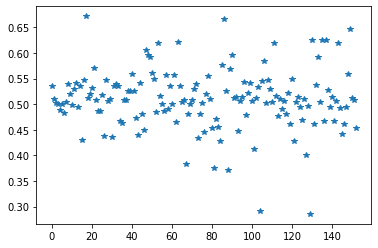

In [32]:
plt.plot(cd['Totalwinrate with Most played Teammate'],'*')

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cd)

          Champions  TotalPlayed  Totalwinrate  \
0           Camille         4589      0.519067   
1            Irelia         2218      0.483318   
2            Graves         5812      0.503441   
3          Vladimir         1204      0.478405   
4          Volibear          816      0.454657   
5          Renekton         2471      0.510320   
6             Riven          956      0.515690   
7            Aatrox         2312      0.515571   
8            Wukong         1158      0.529361   
9              Sett         3182      0.471087   
10            Sylas         3255      0.489708   
11             Shen         1877      0.517848   
12             Lulu         1772      0.505643   
13           Kennen         1114      0.524237   
14            Akali         3994      0.481723   
15            Urgot          375      0.453333   
16          Hecarim         2836      0.514104   
17            Annie          595      0.524370   
18             Sion          552      0.478261   


In [34]:
cd.sort_values('Totalwinrate with Most played Teammate', ascending=False)

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
17,Annie,595,0.524370,Graves,65.0,0.671875,0.529437,0.068806
86,Dr. Mundo,168,0.464286,Jhin,21.0,0.666667,0.500000,0.166667
149,Zyra,223,0.560538,Jhin,52.0,0.647059,0.555706,0.069497
130,Corki,102,0.460784,Jhin,16.0,0.625000,NaN,NaN
135,Ziggs,200,0.525000,Camille,16.0,0.625000,NaN,NaN
...,...,...,...,...,...,...,...,...
67,Shaco,757,0.462351,Jhin,74.0,0.383562,0.383311,0.073468
81,Singed,298,0.479866,Jhin,40.0,0.375000,0.470044,0.071690
88,Malzahar,212,0.490566,Jhin,35.0,0.371429,0.544502,0.113003
104,Vel'Koz,298,0.432886,Graves,24.0,0.291667,0.291667,0.000000


In [35]:
bc=cd[cd['Totalwinrate with Most played Teammate']>=0.55]
bc.sort_values('Times played together', ascending=False)

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
148,Alistar,2989,0.520910,Kai'Sa,665.0,0.558104,0.519334,0.071504
53,Galio,2278,0.554873,Camille,389.0,0.620321,0.539738,0.083250
48,Olaf,1599,0.552220,Kai'Sa,350.0,0.596542,0.555850,0.075181
21,Malphite,2082,0.514409,Kai'Sa,330.0,0.570122,0.515809,0.082598
61,Vayne,1480,0.514865,Graves,169.0,0.557576,0.533998,0.079518
106,Draven,1074,0.519553,Thresh,166.0,0.584337,0.515149,0.079502
90,Kassadin,855,0.504094,Jhin,162.0,0.596273,0.519183,0.101280
57,Yasuo,1254,0.491228,Kai'Sa,124.0,0.556452,0.502351,0.081378
40,Poppy,748,0.483957,Jhin,78.0,0.558442,0.516269,0.081463
50,Tahm Kench,263,0.532319,Jhin,73.0,0.561644,0.559955,0.120444


In [36]:
cd[cd['Most played teammate(without Jhin)']!="Kai'Sa"]

KeyError: 'Most played teammate(without Jhin)'

In [37]:
CSdf[CSdf['Champions']=="Kai'Sa"]

,Champions,BlueWon,BluePlayed,RedWon,RedPlayed,TotalPlayed,Bluewinrate,Redwinrate,Totalwinrate,Role1,Role2,#Role1,#Role2
87,Kai'Sa,1758,3347,1687,3348,6695,0.525246,0.503883,0.514563,Adc,Mid,6607,39


In [38]:
cd.sort_values('TotalPlayed', ascending=False)

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
75,Jhin,7347,0.512046,Graves,1083.0,0.502343,0.508451,0.058482
87,Kai'Sa,6695,0.514563,Graves,997.0,0.526423,0.509563,0.061402
2,Graves,5812,0.503441,Jhin,1073.0,0.502343,0.502248,0.068744
25,Lucian,5289,0.469465,Graves,320.0,0.517572,0.489490,0.063629
46,Ezreal,4699,0.464780,Graves,699.0,0.450292,0.467566,0.064909
...,...,...,...,...,...,...,...,...
111,Aurelion Sol,128,0.531250,Kai'Sa,21.0,0.619048,0.619048,0.000000
131,Sivir,119,0.453782,Camille,14.0,0.461538,NaN,NaN
121,Trundle,112,0.383929,Jhin,14.0,0.428571,NaN,NaN
130,Corki,102,0.460784,Jhin,16.0,0.625000,NaN,NaN


In [39]:
cd[cd['TotalPlayed']>=5000]

,Champions,TotalPlayed,Totalwinrate,Most played teammate(Love is in the air),Times played together,Totalwinrate with Most played Teammate,Winrate with all Teammates over 20 Games,Standard derivation wT over 20 Games
2,Graves,5812,0.503441,Jhin,1073.0,0.502343,0.502248,0.068744
25,Lucian,5289,0.469465,Graves,320.0,0.517572,0.489490,0.063629
75,Jhin,7347,0.512046,Graves,1083.0,0.502343,0.508451,0.058482
87,Kai'Sa,6695,0.514563,Graves,997.0,0.526423,0.509563,0.061402


In [40]:
CSdf[CSdf['TotalPlayed']>=5000]

,Champions,BlueWon,BluePlayed,RedWon,RedPlayed,TotalPlayed,Bluewinrate,Redwinrate,Totalwinrate,Role1,Role2,#Role1,#Role2
2,Graves,1583,3096,1343,2716,5812,0.511305,0.494477,0.503441,Jng,Mid,5708,48
25,Lucian,1239,2627,1244,2662,5289,0.471641,0.467318,0.469465,Adc,Mid,2328,1835
75,Jhin,1944,3710,1818,3637,7347,0.523989,0.499863,0.512046,Adc,Mid,7307,27
87,Kai'Sa,1758,3347,1687,3348,6695,0.525246,0.503883,0.514563,Adc,Mid,6607,39


In [41]:
k=[['Adc','Sup'],['Mid','Jng'],['Jng','Sup'],['Top','Mid'],['Top','Jng']]

In [42]:
nak = pd.DataFrame(CSdf['Champions'])
nak['Role']=CSdf['Role1']
nak['TotalPlayed']=CSdf['TotalPlayed']
nak['Totalwinrate']=CSdf['Totalwinrate']
import time
start=time.process_time();
for ii in range(len(CSdf)): 
    champ=CSdf.loc[ii,'Champions']
    role=CSdf.loc[ii,'Role1']
    blue=df.loc[(df['B'+role]==champ)];
    red=df.loc[(df['R'+role]==champ)];
    Roles = ['Top','Jng','Mid','Adc','Sup']
    Roles.remove(role)
    for i in Roles:
        cs=pd.DataFrame()
        cs=cs.append(blue['B'+i].value_counts());
        cs=cs.append(red['R'+i].value_counts());
        f=cs.sum(axis=0)
        nak.loc[ii,'Most played teammate in '+i] = f.idxmax()
        nak.loc[ii,'Times played together in ' +i] = f.max()
        
        tm = f.idxmax()
        
        ptr=red.loc[(red['R'+i]==tm)];
        ptb=blue.loc[(blue['B'+i]==tm)];
        b=len(ptb);
        bw=len(ptb[ptb['winner']=='Blue']);
        r=len(ptr);
        rw=len(ptr[ptr['winner']=='Red']);
        twr=(rw+bw)/(r+b)

        nak.loc[ii,'Totalwinrate with Most played Teammate in '+ i]= twr
    
    Roles.append(role)
    
end=time.process_time();

print(end-start)

3.922277424999997


In [43]:
nak[nak['Role']=='Adc']

,Champions,Role,TotalPlayed,Totalwinrate,Most played teammate in Jng,Times played together in Jng,Totalwinrate with Most played Teammate in Jng,Most played teammate in Mid,Times played together in Mid,Totalwinrate with Most played Teammate in Mid,Most played teammate in Adc,Times played together in Adc,Totalwinrate with Most played Teammate in Adc,Most played teammate in Sup,Times played together in Sup,Totalwinrate with Most played Teammate in Sup,Most played teammate in Top,Times played together in Top,Totalwinrate with Most played Teammate in Top
25,Lucian,Adc,5289,0.469465,Graves,313.0,0.517572,Akali,158.0,0.449367,NaN,NaN,NaN,Thresh,221.0,0.524887,Camille,248.0,0.483871
39,Ashe,Adc,2159,0.489115,Graves,289.0,0.525952,Akali,119.0,0.521008,NaN,NaN,NaN,Thresh,180.0,0.550000,Camille,204.0,0.602941
46,Ezreal,Adc,4699,0.464780,Graves,684.0,0.450292,Akali,296.0,0.449324,NaN,NaN,NaN,Bard,455.0,0.509890,Camille,500.0,0.502000
61,Vayne,Adc,1480,0.514865,Graves,165.0,0.557576,Akali,90.0,0.488889,NaN,NaN,NaN,Lulu,151.0,0.556291,Camille,108.0,0.453704
65,Miss Fortune,Adc,3209,0.505142,Graves,419.0,0.503580,Akali,200.0,0.550000,NaN,NaN,NaN,Leona,364.0,0.516484,Camille,337.0,0.513353
69,Kalista,Adc,447,0.496644,Graves,50.0,0.520000,Akali,30.0,0.600000,NaN,NaN,NaN,Thresh,76.0,0.500000,Camille,40.0,0.575000
73,Senna,Adc,1139,0.482002,Graves,113.0,0.433628,Sylas,52.0,0.500000,NaN,NaN,NaN,Leona,81.0,0.469136,Camille,93.0,0.559140
75,Jhin,Adc,7347,0.512046,Graves,1067.0,0.502343,Akali,494.0,0.536437,NaN,NaN,NaN,Leona,783.0,0.514687,Camille,759.0,0.534914
77,Aphelios,Adc,1616,0.483911,Graves,275.0,0.498182,Akali,120.0,0.508333,NaN,NaN,NaN,Thresh,463.0,0.520518,Camille,173.0,0.462428
82,Tristana,Adc,786,0.497455,Graves,85.0,0.470588,Yone,37.0,0.486486,NaN,NaN,NaN,Leona,66.0,0.515152,Camille,68.0,0.500000


# synergies for the specific roles

In [44]:
asp = pd.DataFrame(CSdf['Champions'])
asp.columns = ['Champions']
champions=CSdf['Champions']
zeros = np.zeros(153).reshape(153,1)
for i in range(len(champions)):
    asp[champions[i]] = zeros

In [45]:
champions

0       Camille
1        Irelia
2        Graves
3      Vladimir
4      Volibear
         ...   
148     Alistar
149        Zyra
150       Xayah
151        Nami
152        Rell
Name: Champions, Length: 153, dtype: object

In [46]:
adc = pd.DataFrame(CSdf[CSdf['Role1']=='Adc']['Champions'])
adc.columns = ['Champions with first Role Adc']
championssup=CSdf[CSdf['Role1']=='Sup']['Champions']
#zeros = np.zeros(len(adc)).reshape(len(adc),1)
#for i in range(len(championssup)):
#    adc[championssup[i]] = zeros

In [47]:
import time
start=time.process_time();
for ii in adc.index: 
    champ=CSdf.loc[ii,'Champions']
    #champ=ii
    #role=CSdf.loc[ii,'Role1']
    role='Adc'
    
    blue=df.loc[(df['B'+role]==champ)];
    red=df.loc[(df['R'+role]==champ)];
    
    i='Sup'
    for iii in championssup:
        #tm=CSdf.loc[iii,'Champions']
        tm=iii

        ptr=red.loc[(red['R'+i]==tm)];
        ptb=blue.loc[(blue['B'+i]==tm)];
        b=len(ptb);
        bw=len(ptb[ptb['winner']=='Blue']);
        r=len(ptr);
        rw=len(ptr[ptr['winner']=='Red']);
        if r+b==0:
            twr=0
        else:
            twr=2*(rw+bw)-(r+b) #+-1 for win/loss
            #twr=(rw+bw)/(r+b) #winrates

        adc.loc[ii,iii]= twr
    
    
    
end=time.process_time();

print(end-start)

0.9081052530000022


In [48]:
syn=[['Adc','Sup'],['Mid','Jng'],['Jng','Sup'],['Top','Mid'],['Top','Jng']]

In [49]:
import time
start=time.process_time();
for i,k in syn:
    adc = pd.DataFrame(CSdf[CSdf['Role1']==i]['Champions'])
    adc.columns = ['Champions with first Role'+i]
    championssup=CSdf[CSdf['Role1']==k]['Champions']


    for ii in adc.index: 
        champ=CSdf.loc[ii,'Champions']
        #champ=ii
        #role=CSdf.loc[ii,'Role1']
        role=i

        blue=df.loc[(df['B'+role]==champ)];
        red=df.loc[(df['R'+role]==champ)];

        
        for iii in championssup:
            #tm=CSdf.loc[iii,'Champions']
            tm=iii

            ptr=red.loc[(red['R'+k]==tm)];
            ptb=blue.loc[(blue['B'+k]==tm)];
            b=len(ptb);
            bw=len(ptb[ptb['winner']=='Blue']);
            r=len(ptr);
            rw=len(ptr[ptr['winner']=='Red']);
            if r+b==0:
                twr=0
            else:
                #twr=2*(rw+bw)-(r+b) #+-1 for win/loss
                #twr=(rw+bw)/(r+b) #winrates
                twr= (((rw+bw)/(r+b))-0.5)*2 #winrates scaled from +1 to -1
            adc.loc[ii,iii]= twr


    adc.to_csv(i+'and'+k+'(WinratesScaledTo+-1).csv',index=True)
end=time.process_time();

print(end-start)

6.813330618000002


In [50]:
adc

,Champions with first RoleTop,Graves,Hecarim,Rengar,Olaf,Warwick,Shaco,Zac,Master Yi,Shyvana,...,Trundle,Lee Sin,Nidalee,Rammus,Udyr,Sejuani,Fiddlesticks,Evelynn,Kindred,Elise
0,Camille,0.053211,0.086142,0.015385,0.141243,-0.176471,-0.333333,-0.257143,0.076923,-0.040000,...,0.250000,0.045685,0.076412,-0.090909,-0.111111,0.058824,-0.023256,-0.081633,-0.008772,0.163934
1,Irelia,-0.132275,0.172414,-0.235294,-0.142857,0.000000,-0.411765,0.058824,-0.500000,0.000000,...,-1.000000,0.050847,0.011765,0.000000,-0.200000,-0.200000,0.238095,-0.047619,0.085714,0.000000
4,Volibear,-0.103448,0.000000,-0.200000,-0.333333,-1.000000,0.500000,-0.333333,-1.000000,-0.500000,...,1.000000,-0.400000,0.000000,-0.333333,-0.600000,0.000000,0.000000,-0.100000,-0.200000,0.000000
5,Renekton,0.037975,0.163636,-0.300000,0.150685,-0.333333,-0.400000,-0.368421,0.428571,0.000000,...,0.000000,-0.053763,0.019011,-1.000000,0.200000,0.076923,0.555556,-0.130435,0.200000,0.037037
6,Riven,0.132075,0.111111,-0.411765,0.200000,0.200000,0.200000,-0.600000,0.333333,0.230769,...,1.000000,0.027027,0.142857,0.142857,0.000000,0.333333,0.058824,0.034483,-0.117647,0.166667
7,Aatrox,0.010676,0.000000,0.157895,0.152941,0.000000,-0.200000,0.090909,-0.111111,0.384615,...,0.000000,0.009709,0.078125,-0.428571,0.272727,0.200000,0.391304,0.076923,-0.094737,-0.086957
8,Wukong,-0.065574,0.081081,0.076923,0.210526,0.000000,0.000000,0.111111,0.666667,-0.076923,...,-1.000000,0.157895,-0.037037,-0.600000,0.142857,0.428571,0.750000,0.047619,0.054545,0.153846
11,Shen,0.069124,0.021277,0.272727,0.064516,-0.333333,0.666667,-0.333333,-0.333333,-0.200000,...,1.000000,0.087719,-0.060241,-0.142857,0.230769,1.000000,0.428571,-0.058824,0.139785,-0.028571
13,Kennen,0.088608,-0.050000,-0.411765,0.333333,0.000000,0.500000,0.500000,-0.500000,-0.333333,...,0.000000,0.246753,0.133333,-1.000000,-0.333333,0.000000,0.333333,-0.428571,0.054545,-0.500000
15,Urgot,-0.200000,0.037037,-0.200000,-0.142857,1.000000,0.000000,-1.000000,-0.333333,-0.500000,...,-1.000000,-0.111111,-0.153846,0.000000,0.333333,0.000000,1.000000,0.000000,-0.100000,0.250000


In [51]:
#asp = pd.DataFrame(CSdf['Champions'])
#asp['Role']=CSdf['Role1']
#asp['TotalPlayed']=CSdf['TotalPlayed']
#asp['Totalwinrate']=CSdf['Totalwinrate']
#asp.columns = ['Champions']


import time
start=time.process_time();
for ii in range(len(CSdf)): 
    champ=CSdf.loc[ii,'Champions']
    #role=CSdf.loc[ii,'Role1']
    role='Adc'
    
    blue=df.loc[(df['B'+role]==champ)];
    red=df.loc[(df['R'+role]==champ)];
    
    i='Sup'
    for iii in range(len(CSdf)):
        tm=CSdf.loc[iii,'Champions']

        ptr=red.loc[(red['R'+i]==tm)];
        ptb=blue.loc[(blue['B'+i]==tm)];
        b=len(ptb);
        bw=len(ptb[ptb['winner']=='Blue']);
        r=len(ptr);
        rw=len(ptr[ptr['winner']=='Red']);
        if r+b==0:
            twr=0
        else:
            twr=(rw+bw)/(r+b)

        asp.loc[ii,tm]= twr
    
    
    
end=time.process_time();

print(end-start)

30.645195745000002


In [52]:
role='Adc'
champ='Miss Fortune'
blue=df.loc[(df['B'+role]==champ)];
red=df.loc[(df['R'+role]==champ)]; 
i='Sup'
tm='Volibear'
ptr=red.loc[(red['R'+i]==tm)];
ptb=blue.loc[(blue['B'+i]==tm)];
b=len(ptb);
bw=len(ptb[ptb['winner']=='Blue']);
r=len(ptr);
rw=len(ptr[ptr['winner']=='Red']);
twr=(rw+bw)/(r+b)

ZeroDivisionError: division by zero

In [ ]:
ra=df[df['BAdc']=='Ezreal']
ra[ra['BSup']=='Volibear']

In [ ]:
asp[CSdf['Role1']=='Adc']

In [ ]:
asp.to_csv('AdcAndSup.csv',index=True)

In [ ]:
lol=pd.DataFrame()
for i in Roles:
    a=CSdf[CSdf['Role1']==i]
    jo=a['TotalPlayed']
    lol.loc[i,'MostPlayed']=CSdf.loc[jo.idxmax(),'Champions']
    jo=jo.drop(jo.idxmax())
    lol.loc[i,'SecondMostPlayed']=CSdf.loc[jo.idxmax(),'Champions']
    jo=jo.drop(jo.idxmax())
    lol.loc[i,'ThirdMostPlayed']=CSdf.loc[jo.idxmax(),'Champions']
    jo=jo.drop(jo.idxmax())
    lol.loc[i,'FourthMostPlayed']=CSdf.loc[jo.idxmax(),'Champions']
    jo=jo.drop(jo.idxmax())
    lol.loc[i,'FifthMostPlayed']=CSdf.loc[jo.idxmax(),'Champions']
    jo=jo.drop(jo.idxmax())
    lol.loc[i,'SixthMostPlayed']=CSdf.loc[jo.idxmax(),'Champions']

In [ ]:
jo=a['TotalPlayed']
jo.idxmax()

In [ ]:
lol

In [ ]:
eis=df.copy()
#for i in Roles:
i='Top'
eis=eis[((eis['B'+i]==lol.loc[i,'MostPlayed'])&(eis['R'+i]==lol.loc[i,'SecondMostPlayed'])) | ((eis['R'+i]==lol.loc[i,'MostPlayed'])&(eis['B'+i]==lol.loc[i,'SecondMostPlayed']))]

In [ ]:
eis

In [ ]:
i='Jng'
eis=eis[((eis['B'+i]==lol.loc[i,'MostPlayed'])&(eis['R'+i]==lol.loc[i,'SecondMostPlayed'])) | ((eis['R'+i]==lol.loc[i,'MostPlayed'])&(eis['B'+i]==lol.loc[i,'SecondMostPlayed']))]

In [ ]:
eis

# Part Two

In [ ]:
def getNmostPlayedByRole(n,data,columnNames=[],championNames=True):
    res = pd.DataFrame()
    for i in Roles:
        a = data[data['Role1']==i]
        jo = a['TotalPlayed']

        for j in range(1,n+1):
            if (championNames):
                colName = str(j)+'.mostPlayed'
                res.loc[i,colName] = data.loc[jo.idxmax(),'Champions']
            
            for k in columnNames:
                colRate = str(j)+'.'+k
                res.loc[i,colRate] = data.loc[jo.idxmax(),k]
            
            jo=jo.drop(jo.idxmax())
    return res

In [ ]:
getNmostPlayedByRole(10,CSdf)

In [ ]:
def cond(t,role,data,n):
    colName = str(n)+'.mostPlayed'
    return (t['B'+role]==data.loc[role,colName])|(t['R'+role]==data.loc[role,colName])

In [ ]:
def atLeastOne(role,n):
    res = df.copy()
    nMostPlayedDf = getNmostPlayedByRole(n,CSdf)
    
    condition = cond(res,role,nMostPlayedDf,1)
    for i in range(2,n+1):
        condition = (condition | cond(res,role,nMostPlayedDf,i))
    
    res = res[condition]
    return res

In [ ]:
len(df)

In [ ]:
#percantage of all games
def percantageOfAllGames(data):
    rel = len(data) / len(df)
    return round(100*rel,1)

In 90% of the games(in this patch) there was at least one of the 6 most played Adc-champions played.
In 62.2% of the games either the most or the second most Adc-champion was played.

In [ ]:
def cumulate(k):
    
    kumuliert = []
    x_coord = []
    
    roleCounter = 0
    for i in Roles:
        for n in range(1,1+k):
            kumuliert.append( percantageOfAllGames(atLeastOne(i,n)) )
            x_coord.append(roleCounter)
        roleCounter += 1
    
    x = np.arange(len(Roles))  # the label locations

    fig, ax = plt.subplots()
    ax.bar(x_coord,kumuliert,color='#00123456')   #         #1372ac = rgba(19, 114, 172, 1)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title('cumulated Percantage of games where at least 1,2,...,'+ str(k) +' of the most played champions in a role were played')
    ax.set_xticks(x)
    ax.set_xticklabels(Roles)
    
    ax.set_ylim([0,100])


    plt.show()

In [ ]:
def cumulate_easyRead(k):
    
    kumuliert = []
    x_coord = []
    
    roleCounter = 0
    for i in Roles:
        for n in range(1,1+k):
            kumuliert.append( percantageOfAllGames(atLeastOne(i,n)) )
            x_coord.append(roleCounter)
            roleCounter += 1
        roleCounter += 1
    
    #x = np.arange(len(Roles))  # the label locations
    x = []
    for i in range(0,5):

        x.append(2+i*6)
    x

    fig, ax = plt.subplots()
    ax.bar(x_coord,kumuliert,color='#00123456')   #         #1372ac = rgba(19, 114, 172, 1)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent')
    ax.set_title('cumulated Percantage of games where at least 1,2,...,'+ str(k) +' of the most played champions in a role were played')
    ax.set_xticks(x)
    ax.set_xticklabels(Roles)
    
    ax.set_ylim([0,100])


    plt.show()

In [ ]:
x = []
for i in range(0,5):

    x.append(2+i*6)
x

In [ ]:
cumulate_easyRead(5)

In [ ]:
def printN(k):
    for i in Roles:
        print(i+':')
        for n in range(1,1+k):
            print( percantageOfAllGames(atLeastOne(i,n)), '%')

In [ ]:
#printN(5)
for i in range(0,6):
    cumulate(6-i)

In [ ]:
cumulate(11)

In [ ]:
def getChampionStats(pArray):
    res = CSdf.copy()
    
    condition = (cd['Champions'] == pArray[0])
    for i in pArray:
        condition = (condition | (cd['Champions'] == i))
    
    res = res[condition]
    return res

In [ ]:
c5 = getChampionStats(['Jayce','Taliyah','Galio','Miss Fortune','Alistar'])
c4 = getChampionStats(['Irelia','Nidalee','Yone','Ezreal','Sett'])
c4

In [ ]:
getNmostPlayedByRole(11,CSdf)

In [ ]:
getNmostPlayedByRole(6,CSdf,['Totalwinrate'],False)

In [ ]:
getNmostPlayedByRole(6,CSdf,['Totalwinrate'])

In [ ]:
getChampionStats(['Galio'])

In [ ]:
first = df[df['RMid']=='Galio']
first = first[['RMid','BMid']]

In [ ]:
#for i in first['BMid']:

 #   first['freq'] = first.groupby(i)['Galio'].transform('count')
first['BMid'].value_counts()

In [ ]:
getChampionStats(['Galio','Akali','Sylas','Viktor','Orianna'])

In [ ]:
temp = first
for i in ['Akali','Sylas','Ekko','Yone']:
    temp = temp[temp['BMid']!=i]
withoutMoreOftenPlayedChamps = temp

In [ ]:
withoutMoreOftenPlayedChamps['BMid'].value_counts()

In [ ]:
def getNmostPlayed_Opponent(n,data,pRole,columnNames=[],championNames=True):
    res = pd.DataFrame()
    for i in [pRole]:
        a = data[data['Role1']==i]
        jo = a['TotalPlayed']

        for j in range(1,n+1):
            if (championNames):
                colName = str(j)+'.mostPlayed'
                res.loc[i,colName] = data.loc[jo.idxmax(),'Champions']
            
            for k in columnNames:
                colRate = str(j)+'.'+k
                res.loc[i,colRate] = data.loc[jo.idxmax(),k]
            
            jo=jo.drop(jo.idxmax())
    return res

In [ ]:
df['freq'] = df.groupby('a')['a'].transform('count')

In [ ]:
getNmostPlayed_Opponent(6,first,['RMid'])